In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [229]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [230]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [231]:
X.shape

(442, 10)

In [232]:
print(X.info())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.

In [233]:
X.isnull().sum().sort_values(ascending=False)

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [234]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1234)

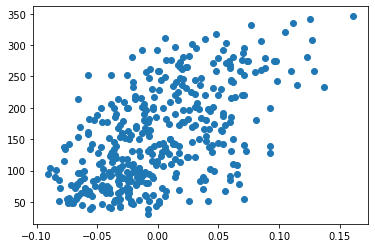

In [235]:
plt.scatter(X_train['bmi'], y_train)

In [236]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.5189640666668461
0.4897292198482337


Clearly our normal or Ordinary least squares regression is overfitting the data. We need to avoid this behaviour.

In [237]:
unregulized_weights = reg.coef_

# Ridge Regression
Is a form regularization technique. Regularization is another way of saying that we introduce some kind of restriction on the model. It is especially useful for situations where our model is overfitting on the training set and doesn't represent the overall trend well when tested with unknown data.
## Difference between Normal regression and Ridge Regression
Normally a linear regression model minimizes the sum of the squared residuals. On the other hand Ridge regression goes a bit further and minimizes sum of the squared residuals + alpha * slope^2. the extra term is called a penalty term and alpha tells us how severe the penalty is. The more the magnitude of alpha, the greater desensitization of the independant variable on the dependant variable.

In [238]:
alphas = [1e-3, 1e-2, 1e-1, 1e-4, 1e-5,1e-10, 2e-10, 1]
clf_scores, train_scores = [], []
for alpha in alphas:    
   clf = linear_model.Ridge(alpha)   
   cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring ='r2', return_train_score=True)
   clf_scores.append(cv_results['test_score'].mean())
   train_scores.append(cv_results['train_score'].mean())
print(clf_scores)

[0.4844217768024416, 0.48498528719693346, 0.4830572329759419, 0.48378746270510026, 0.4836997975891034, 0.48368971360372015, 0.4836897137049134, 0.41074910051056845]


In [239]:
alphas

[0.001, 0.01, 0.1, 0.0001, 1e-05, 1e-10, 2e-10, 1]

Text(0, 0.5, 'Cross-Validated Accuracy')

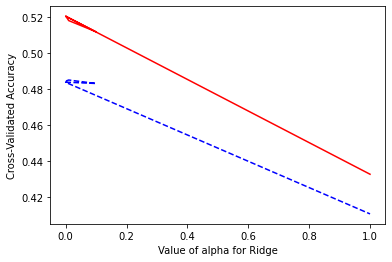

In [240]:
plt.plot(alphas, clf_scores, "--b")
plt.plot(alphas, train_scores, "-r")
plt.xlabel('Value of alpha for Ridge')
plt.ylabel('Cross-Validated Accuracy')

# Using scikit learn's built in RidgeCV 

In [241]:
clf_cv = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1,0.1,  1]).fit(X_train, y_train)
print(clf_cv.score(X_train, y_train))
print(clf_cv.score(X_test, y_test))

0.5188694277329873
0.4935561868169459


In [242]:
best_clf = linear_model.Ridge(alpha=1e-2)
best_clf.fit(X_train, y_train)
best_weights = best_clf.coef_

In [243]:
best_clf.score(X_test, y_test)

0.5050629832529498

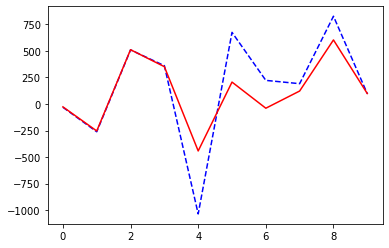

In [244]:
plt.plot(unregulized_weights, "--b")
plt.plot(best_weights, "-r")